<a href="https://colab.research.google.com/github/udaybhaskar717/Market_Basket_Analysis_ISTP/blob/main/ISTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Market_Basket_Optimisation.csv",header=None)

# DataAnalysis

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.value_counts(sort=False)

0       1        2        3               4             5                 6     7               8             9             10              11         12     13     14             15      16                 17               18       19       
shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  yams  cottage cheese  energy drink  tomato juice  low fat yogurt  green tea  honey  salad  mineral water  salmon  antioxydant juice  frozen smoothie  spinach  olive oil    1
dtype: int64

In [ ]:
s=set()
for i in df.index:
    for j in df.columns:
        s.add(df.loc[i,j])

In [ ]:
for i in df.columns:
    print(df[i].value_counts(sort=False))

In [ ]:
d =dict()
for j in s:
    total=0
    for i in df.columns:
        total +=(df[i]==j).sum()
    d[j] = total

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
l1 =sorted(d.items(), key =lambda kv:(kv[1], kv[0]),reverse=True)

In [ ]:
l1.remove(l1[-1])

In [ ]:
X=[]
Y=[]
for i in l1:
    X.append(i[0])
    Y.append(i[1])

<Figure size 432x288 with 0 Axes>

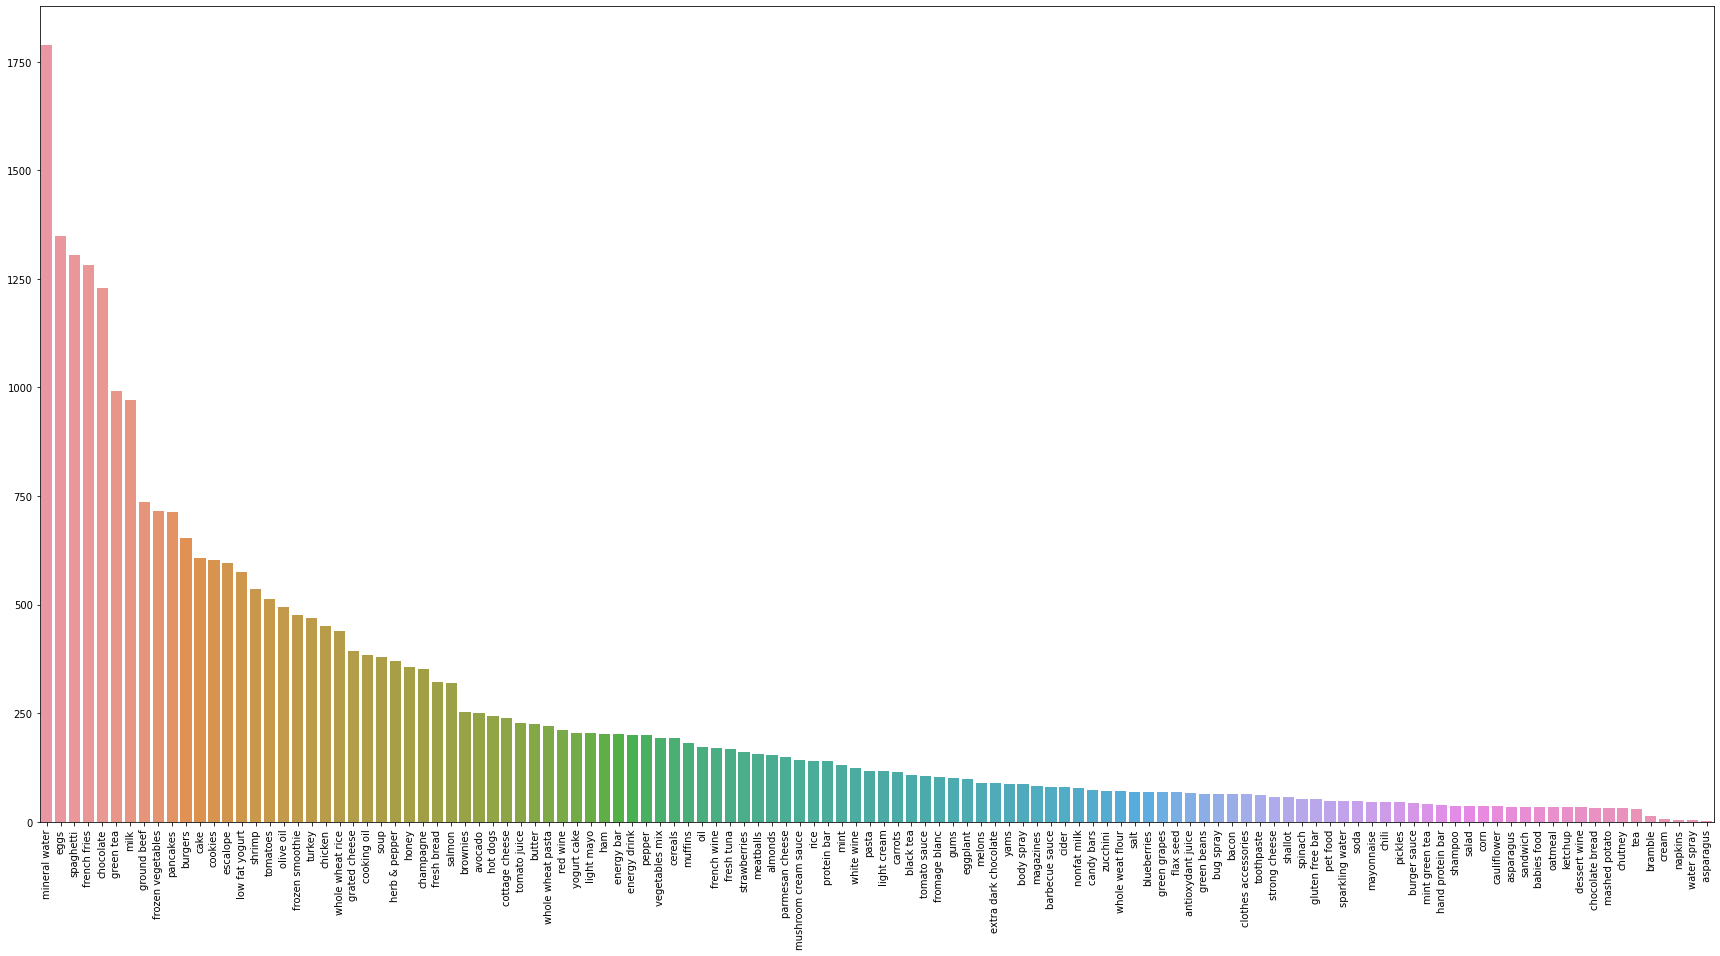

In [ ]:
plt.gcf()
plt.figure(figsize=(30,15))
sns.barplot(x=X,y=Y)
plt.xticks(rotation =90)
plt.show()

# Algorithm

In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from apyori import apriori

In [ ]:
l=[]
for i in range(1,7501):
    l.append([str(df.values[i,j]) for j in range(0,20)])

In [ ]:
l

In [ ]:
association_rules = apriori(l, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'light cream', 'chicken'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'shrimp', 'pasta'})
frozenset({'light cream', 'chicken', 'nan'})
frozenset({'chocolate', 'frozen vegetables', 'shrimp'})
frozenset({'spaghetti', 'ground beef', 'cooking oil'})
frozenset({'mushroom cream sauce', 'nan', 'escalope'})
frozenset({'pasta', 'nan', 'escalope'})
frozenset({'spaghetti', 'frozen vegetables', 'ground beef'})
frozenset({'frozen vegetables', 'olive oil', 'milk'})
frozenset({'frozen vegetables', 'shrimp', 'mineral water'})
frozenset({'spaghetti', 'frozen vegetables', 'olive oil'})
frozenset({'spaghetti', 'frozen vegetables', 'shrimp'})
frozenset({'spaghetti', 'frozen vegetables', 'tomatoes'})
frozenset({'spaghetti', 'grated cheese', 'ground beef'})
frozenset({'herb & pepper', 'mineral water', 'ground beef'})


In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
-----------------------------------------------------
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
-----------------------------------------------------
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
-----------------------------------------------------
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
-----------------------------------------------------
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
-----------------------------------------------------
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
-----------------------------------------------